<a href="https://colab.research.google.com/github/bjoyita/Regression_ML/blob/main/BinaryLogReg_CorrData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION: Materials Property (Corrosion resistance)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv('SyntheticCorrData3.csv', encoding='latin')

In [3]:
# Create a DataFrame
df = pd.DataFrame(data)
df

,Metal/Alloy Name,Corrosion Rate (mpy),Corrosion Density Current (µA/cm²),Polarization Resistance (ohms),Media,Corrosion Resistance
0,"Al-74%, Zn-26%",0.194,9.09,526.30,Atmospheric,Fair
1,"Al-80%, Zn-20%",0.476,2.47,5318.23,Sulfide Solution,Poor
2,"Al-78%, C-22%",0.369,1.53,5410.94,Oil & Gas Environment,Poor
3,"Al-70%, Mg-30%",0.303,4.95,6377.92,Alkaline Solution,Poor
4,"Cu-81%, Mg-19%",0.086,9.86,7263.65,Acidic Solution,Excellent
...,...,...,...,...,...,...
145,"Fe-82%, Mg-18%",0.028,5.27,9473.01,Atmospheric,Excellent
146,"Al-61%, C-39%",0.309,7.72,9860.15,Sulfide Solution,Poor
147,"Al-81%, Mg-19%",0.256,2.24,7536.25,Oil & Gas Environment,Fair
148,"Al-85%, Zn-15%",0.035,6.27,3768.83,Seawater,Excellent


**BINARY LOGISTIC REGRESSION**

**Preprocessing**

In [4]:
# filtering the rows with 'poor' and 'excellent' corrosion resistance

df_binary = df[df['Corrosion Resistance'].str.contains('Poor|Excellent')]

In [5]:
df_binary

,Metal/Alloy Name,Corrosion Rate (mpy),Corrosion Density Current (µA/cm²),Polarization Resistance (ohms),Media,Corrosion Resistance
1,"Al-80%, Zn-20%",0.476,2.47,5318.23,Sulfide Solution,Poor
2,"Al-78%, C-22%",0.369,1.53,5410.94,Oil & Gas Environment,Poor
3,"Al-70%, Mg-30%",0.303,4.95,6377.92,Alkaline Solution,Poor
4,"Cu-81%, Mg-19%",0.086,9.86,7263.65,Acidic Solution,Excellent
5,"Cu-83%, C-17%",0.086,2.50,9758.76,Acidic Solution,Excellent
...,...,...,...,...,...,...
144,"Cu-75%, C-25%",0.150,1.36,8129.87,Atmospheric,Excellent
145,"Fe-82%, Mg-18%",0.028,5.27,9473.01,Atmospheric,Excellent
146,"Al-61%, C-39%",0.309,7.72,9860.15,Sulfide Solution,Poor
148,"Al-85%, Zn-15%",0.035,6.27,3768.83,Seawater,Excellent


In [6]:
X = df_binary.iloc[:, 1:5].values
y = df_binary.iloc[:, -1].values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_binary['Media'] = le.fit_transform(df_binary['Media'])

<ipython-input-7-939c78587dd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Media'] = le.fit_transform(df_binary['Media'])


In [8]:
list(le.classes_)

['Acidic Solution',
 'Alkaline Solution',
 'Atmospheric',
 'Oil & Gas Environment',
 'Seawater',
 'Sulfide Solution']

In [9]:
list(le.inverse_transform([0,1,2,3,4,5]))

['Acidic Solution',
 'Alkaline Solution',
 'Atmospheric',
 'Oil & Gas Environment',
 'Seawater',
 'Sulfide Solution']

In [10]:
X = df_binary[['Corrosion Rate (mpy)', 'Corrosion Density Current (µA/cm²)', 'Polarization Resistance (ohms)', 'Media']]
y = df_binary[['Corrosion Resistance']]

In [11]:
X

,Corrosion Rate (mpy),Corrosion Density Current (µA/cm²),Polarization Resistance (ohms),Media
1,0.476,2.47,5318.23,5
2,0.369,1.53,5410.94,3
3,0.303,4.95,6377.92,1
4,0.086,9.86,7263.65,0
5,0.086,2.50,9758.76,0
...,...,...,...,...
144,0.150,1.36,8129.87,2
145,0.028,5.27,9473.01,2
146,0.309,7.72,9860.15,5
148,0.035,6.27,3768.83,4


In [12]:
y

,Corrosion Resistance
1,Poor
2,Poor
3,Poor
4,Excellent
5,Excellent
...,...
144,Excellent
145,Excellent
146,Poor
148,Excellent


In [13]:
df_binary['Corrosion Resistance'] = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-13-bb731dc9d548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Corrosion Resistance'] = le.fit_transform(y)


In [14]:
y=df_binary['Corrosion Resistance']

In [15]:
list(le.classes_)

['Excellent', 'Poor']

In [16]:
list(le.inverse_transform([0,1]))

['Excellent', 'Poor']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [18]:
X_train

,Corrosion Rate (mpy),Corrosion Density Current (µA/cm²),Polarization Resistance (ohms),Media
139,0.486,5.95,822.67,3
71,0.107,5.73,192.04,0
14,0.099,0.99,8361.44,0
8,0.305,2.45,7953.91,1
43,0.456,6.37,4344.18,5
...,...,...,...,...
145,0.028,5.27,9473.01,2
92,0.383,9.16,3726.46,0
88,0.445,6.49,7508.64,3
67,0.403,7.49,9054.45,5


In [19]:
y_train

139    1
71     0
14     0
8      1
43     1
      ..
145    0
92     1
88     1
67     1
62     1
Name: Corrosion Resistance, Length: 94, dtype: int64

In [20]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6 0]
 [0 5]]


1.0

<Axes: >

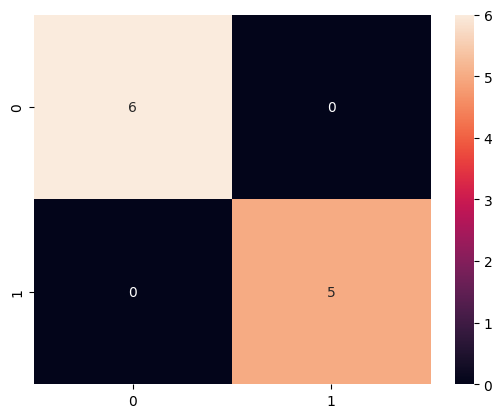

In [22]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

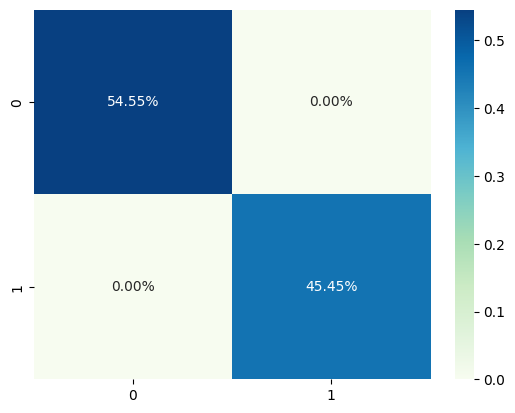

In [23]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='GnBu')